In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Define class names for better interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Explore the data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


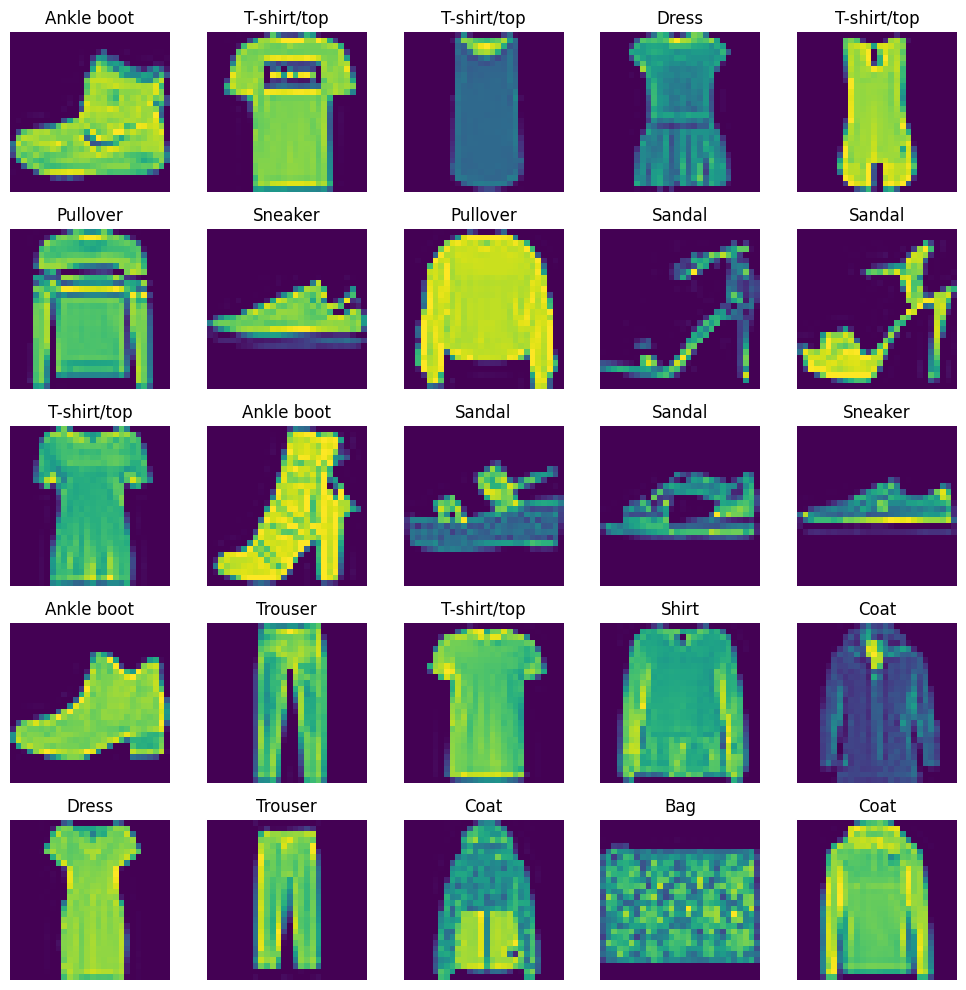

In [2]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print(X_train_flattened.shape)

(60000, 784)


In [4]:
# Build logistic regression model
model_lr = keras.Sequential([
    keras.layers.Dense(10, activation='softmax', input_shape=(784,))
])

# Compile the model
model_lr.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_lr = model_lr.fit(
    X_train_flattened, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss_lr, test_acc_lr = model_lr.evaluate(X_test_flattened, y_test)
print(f"Logistic Regression Test Accuracy: {test_acc_lr:.4f}")

Epoch 1/10


D:\github_code\ML\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.7230 - loss: 0.8243 - val_accuracy: 0.8268 - val_loss: 0.5099
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.8338 - loss: 0.4844 - val_accuracy: 0.8369 - val_loss: 0.4702
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.8487 - loss: 0.4428 - val_accuracy: 0.8529 - val_loss: 0.4347
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8524 - loss: 0.4320 - val_accuracy: 0.8509 - val_loss: 0.4331
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.8582 - loss: 0.4131 - val_accuracy: 0.8557 - val_loss: 0.4262
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.8589 - loss: 0.4134 - val_accuracy: 0.8570 - val_loss: 0.4191
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.8596 - loss: 0.4096 - val_accuracy: 0.8543 - val_loss: 0.4203
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8643 - loss: 0.39

In [4]:
# Build a simple neural network
model_nn = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_nn = model_nn.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss_nn, test_acc_nn = model_nn.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {test_acc_nn:.4f}")

NameError: name 'keras' is not defined

In [5]:
# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Build a CNN model
model_cnn = keras.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {test_acc_cnn:.4f}")

NameError: name 'X_train' is not defined

In [34]:
# Build a 2nd CNN model
model_cnn_2 = keras.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),  # Add dropout for regularization
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_cnn_2 = model_cnn_2.fit(
    X_train_cnn, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss_cnn_2, test_acc_cnn_2 = model_cnn_2.evaluate(X_test_cnn, y_test)
print(f"CNN_2 Test Accuracy: {test_acc_cnn_2:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6753 - loss: 0.8698 - val_accuracy: 0.8343 - val_loss: 0.4461
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8446 - loss: 0.4243 - val_accuracy: 0.8634 - val_loss: 0.3644
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8656 - loss: 0.3664 - val_accuracy: 0.8728 - val_loss: 0.3393
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8839 - loss: 0.3142 - val_accuracy: 0.8800 - val_loss: 0.3221
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8919 - loss: 0.2926 - val_accuracy: 0.8833 - val_loss: 0.3095
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9036 - loss: 0.2595 - val_accuracy: 0.8780 - val_loss: 0.3374
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9094 - loss: 0.2394 - val_accuracy: 0.8885 - val_loss: 0.3235
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9161 - loss: 0.2237 - 

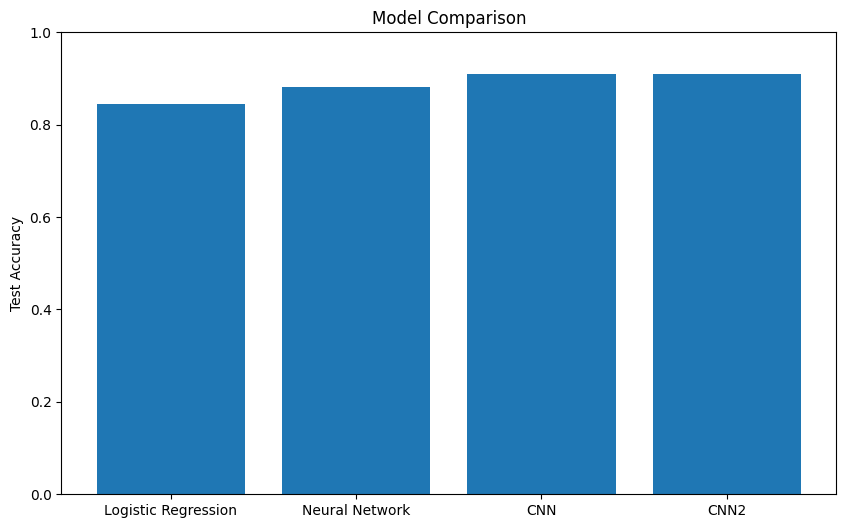

In [28]:
# Compare model accuracies
models = ['Logistic Regression', 'Neural Network', 'CNN', 'CNN2']
accuracies = [test_acc_lr, test_acc_nn, test_acc_cnn, test_acc_cnn_2]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Model Comparison')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


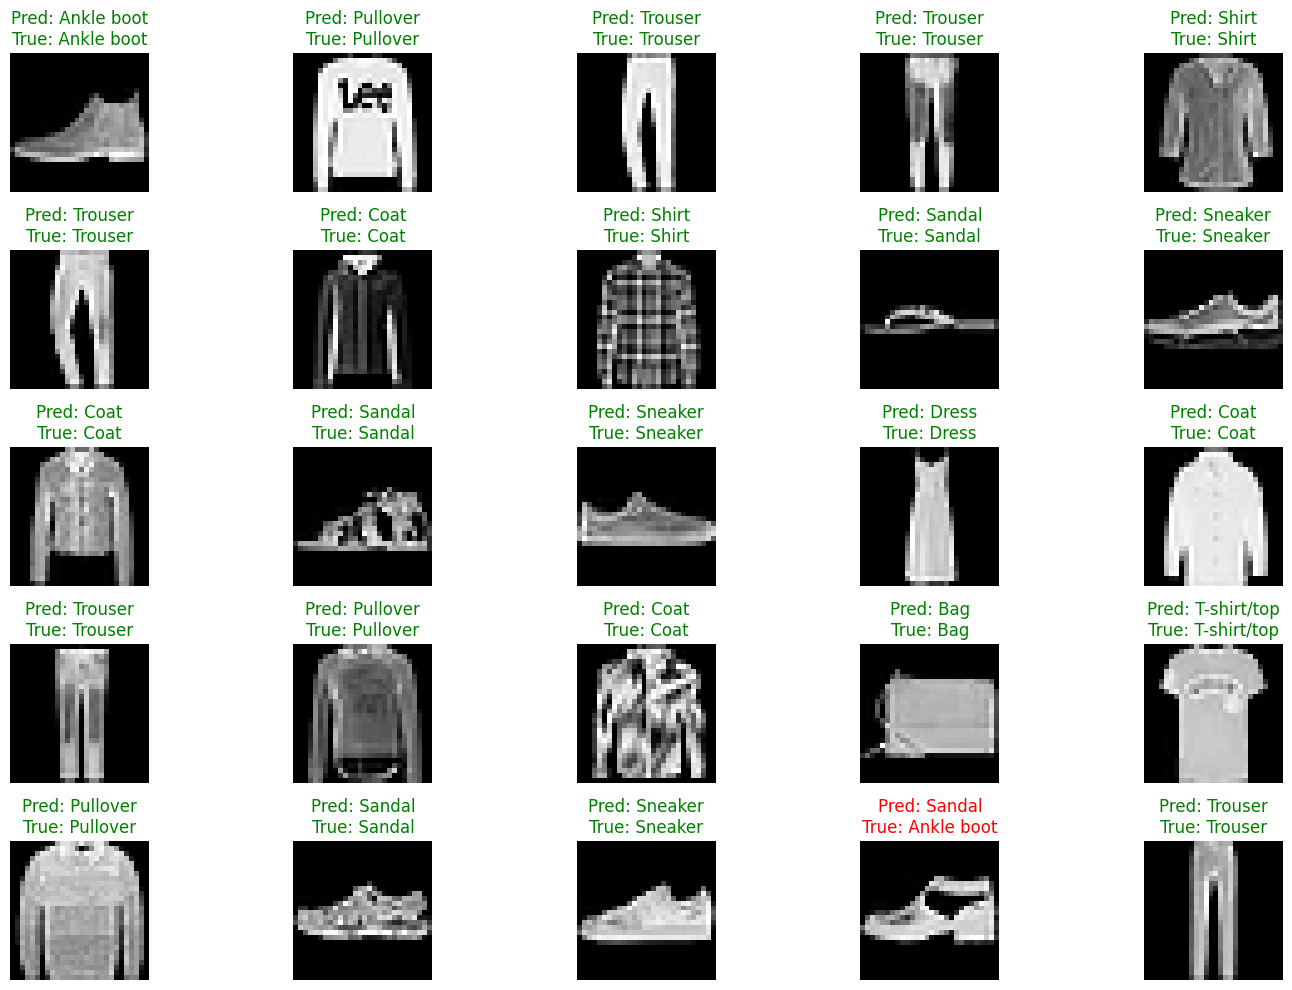

In [30]:
# Make predictions with the CNN model
predictions = model_cnn_2.predict(X_test_cnn)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[y_test[i]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

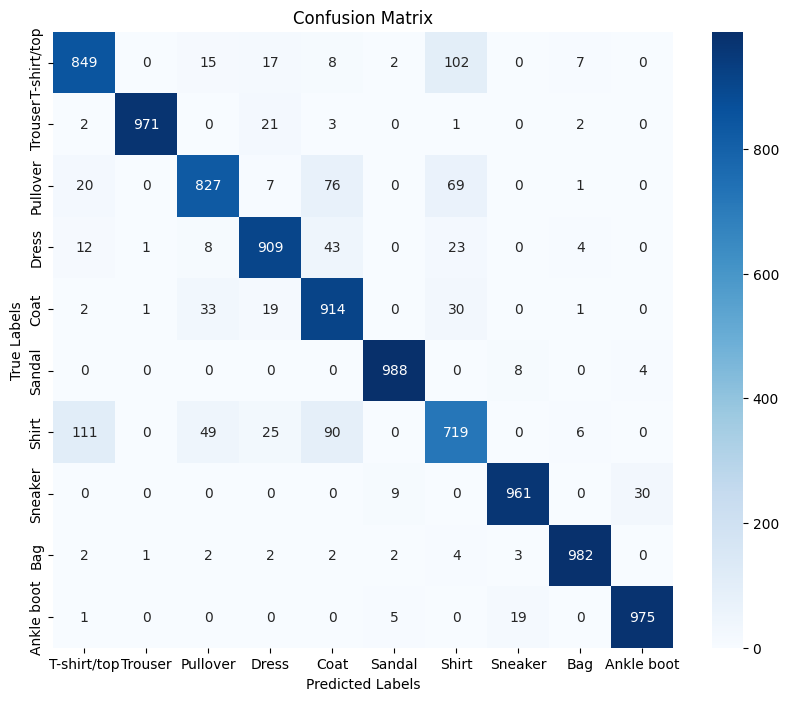

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 